# Analysis : Identifying the Most Valuable Players Based on xG and xA Per 90 Minutes

## Objective
The goal of this analysis is to identify the most valuable players in the Premier League 2024/25 season based on their contributions relative to expected goals (xG) and expected assists (xA) **per 90 minutes**. 

Analyzing per 90-minute statistics allows us to make fair comparisons between players regardless of their total playing time, helping to uncover players who make a significant impact when they are on the pitch, even if they have not played as many total minutes.

## Key Metrics:
- **xG per 90 minutes:** Expected goals a player is likely to score every 90 minutes.
- **xA per 90 minutes:** Expected assists a player is likely to provide every 90 minutes.
- **xG + xA per 90 minutes:** Combined contribution to the team's expected goals per 90 minutes.


## Key Questions to be Analyzed
1. **Who are the most valuable players based on their contributions relative to expected goals (xG) and expected assists (xA) per 90 minutes?**
2. **Which players are the most efficient goal scorers when comparing actual goals to their expected goals?**
3. **Which players are underperforming or overperforming based on their expected goals and assists?**

---


## Step 1: Importing Libraries

In this step, all the essential libraries for data handling, visualization, and numerical analysis were imported.

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['axes.grid'] = True

---
## Step 2: Loading the Scraped Data

The CSV file created from the web scraping process, which contains player performance statistics from the Premier League 2024/25 season, was loaded.

In [2]:
players_df = pd.read_csv('EPL_2024_25_Understat.csv')
players_df.head()

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,1250,Mohamed Salah,38,3392,29,27.706267,18,15.858334,130,89,1,0,F M,Liverpool,20,20.855748,48.535889,16.206758
1,5232,Alexander Isak,34,2822,23,22.356988,6,5.448704,99,42,1,0,F,Newcastle United,19,19.312313,26.209551,3.579238
2,8260,Erling Haaland,31,2749,22,23.954593,3,3.581227,109,29,2,0,F,Manchester City,19,20.909917,22.845246,3.535369
3,4456,Chris Wood,36,3024,20,15.638655,3,3.044111,68,22,1,0,F S,Nottingham Forest,17,13.355148,14.720165,1.669209
4,6552,Bryan Mbeumo,38,3419,20,13.632161,7,10.376489,86,70,3,0,D F M,Brentford,15,9.065148,24.377113,9.351835


---
## Step 3: Clean and Rename Columns

To enhance readability and maintain consistency throughout the analysis, certain columns were renamed using more intuitive and descriptive labels.

In [3]:
players_df.rename(columns={
    'games' : 'Games',
    'time' : 'Minutes Played',
    'goals' : 'Goals',
    'assists' : 'Assists',
    'shots' : 'Shots',
    'key_passes' : 'Key Passes',
    'yellow_cards' : 'Yellow Cards',
    'red_cards' : 'Red Cards',
    'position' : 'Position',
    'player_name': 'Player',
    'team_title': 'Team',
    'xGChain': 'xG Chain',
    'xGBuildup': 'xG Buildup'
}, inplace=True)

In [4]:
# Check the shape of the dataset
print("Dataset shape:", players_df.shape)

# List all column names
print("Columns:", players_df.columns)

# Check for missing values
print("\nMissing values:\n", players_df.isnull().sum())

players_df.describe()

Dataset shape: (562, 18)
Columns: Index(['id', 'Player', 'Games', 'Minutes Played', 'Goals', 'xG', 'Assists',
       'xA', 'Shots', 'Key Passes', 'Yellow Cards', 'Red Cards', 'Position',
       'Team', 'npg', 'npxG', 'xG Chain', 'xG Buildup'],
      dtype='object')

Missing values:
 id                0
Player            0
Games             0
Minutes Played    0
Goals             0
xG                0
Assists           0
xA                0
Shots             0
Key Passes        0
Yellow Cards      0
Red Cards         0
Position          0
Team              0
npg               0
npxG              0
xG Chain          0
xG Buildup        0
dtype: int64


,id,Games,Minutes Played,Goals,xG,Assists,xA,Shots,Key Passes,Yellow Cards,Red Cards,npg,npxG,xG Chain,xG Buildup
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,8128.081851,20.581851,1337.208185,1.923488,2.200242,1.427046,1.627337,17.516014,13.160142,2.741993,0.090747,1.800712,2.087827,6.528051,3.950416
std,3972.744409,12.136239,1065.385455,3.560456,3.609300,2.256110,2.256957,22.366831,16.305221,2.732125,0.305540,3.159932,3.284676,6.523192,3.917180
min,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6054.250000,10.000000,325.250000,0.000000,0.083089,0.000000,0.071857,1.000000,1.000000,0.000000,0.000000,0.000000,0.083089,1.271974,0.785370
50%,8768.000000,22.000000,1151.500000,0.000000,0.794591,0.000000,0.724003,10.000000,7.000000,2.000000,0.000000,0.000000,0.790356,4.836126,2.985751
75%,11358.500000,32.000000,2242.000000,2.000000,2.652824,2.000000,2.183637,24.750000,19.000000,4.000000,0.000000,2.000000,2.577103,9.678113,6.004263
max,13649.000000,38.000000,3420.000000,29.000000,27.706267,18.000000,15.858334,130.000000,92.000000,12.000000,2.000000,20.000000,20.909917,48.535889,21.517376


---
## Step 4 - Calculating Per 90-Minute Statistics and Overperformance

To enable fair comparisons between players with varying amounts of playing time, key performance metrics were normalized per 90 minutes.

First, the number of 90-minute segments each player participated in was calculated. Based on this, the following per 90-minute statistics were computed:
- Goals per 90 minutes
- Assists per 90 minutes
- Goal Contributions per 90 minutes (sum of goals and assists)

Similarly, expected performance metrics were calculated:
- Expected Goals (xG) per 90 minutes
- Expected Assists (xA) per 90 minutes
- Expected Goal Contributions per 90 minutes (sum of expected goals and expected assists)

Finally, performance per 90 minutes was derived by subtracting the expected goal contributions from the actual goal contributions. This value indicates whether a player is exceeding or underperforming relative to their expected contribution.

A preview of the calculated metrics is displayed below to verify the results.


In [5]:
# Calculate number of 90-minute segments played
players_df['Nineties'] = players_df['Minutes Played'] / 90

# Calculate actual goal contributions per 90 minutes
players_df['Goals Per90'] = players_df['Goals'] / players_df['Nineties']
players_df['Assists Per90'] = players_df['Assists'] / players_df['Nineties']
players_df['Goal Contributions Per90'] = players_df['Goals Per90'] + players_df['Assists Per90']

# Calculate expected goal contributions per 90 minutes
players_df['xG Per90'] = players_df['xG'] / players_df['Nineties']
players_df['xA Per90'] = players_df['xA'] / players_df['Nineties']
players_df['xGoal Contributions Per90'] = players_df['xG Per90'] + players_df['xA Per90']

# Calculate Performance (Actual - Expected)
players_df['Performance Per90'] = players_df['Goal Contributions Per90'] - players_df['xGoal Contributions Per90']

players_df[['Player', 'Goal Contributions Per90', 'xGoal Contributions Per90', 'Performance Per90']].head()

,Player,Goal Contributions Per90,xGoal Contributions Per90,Performance Per90
0,Mohamed Salah,1.247052,1.155900,0.091151
1,Alexander Isak,0.924876,0.886787,0.038089
2,Erling Haaland,0.818479,0.901500,-0.083021
3,Chris Wood,0.684524,0.556035,0.128489
4,Bryan Mbeumo,0.710734,0.631991,0.078743


---
### Step 5 - Identifying Overperformers and Underperformers

With the per 90-minute contributions calculated, the next step was to:
- **Compare actual goals to expected goals (xG).**
- **Compare actual assists to expected assists (xA).**

The objective was to identify:
- Players who consistently exceeded their expected output (overperformers).
- Players who consistently fell below their expected output (underperformers).

To ensure the reliability of the analysis, players with limited playing time were excluded. Only those who played at least 800 minutes were considered.

Visualizations such as scatter plots and bar charts were used to clearly illustrate the trends and highlight significant overperformers and underperformers.


In [6]:
filtered_df = players_df[players_df['Minutes Played'] >= 800].copy()

### Step 6 - Visualizing Overperformance and Underperformance

Scatter plots were created to compare:
- Actual goals versus expected goals (xG)
- Actual assists versus expected assists (xA)

Each data point represents an individual player, with player names labeled for easy identification.

The red dashed line in each plot represents the baseline where actual performance equals expected performance. Players positioned above the line were overperforming relative to expectations, while players below the line were underperforming.

These visualizations provided a clear overview of which players significantly exceeded or fell short of their expected contributions.


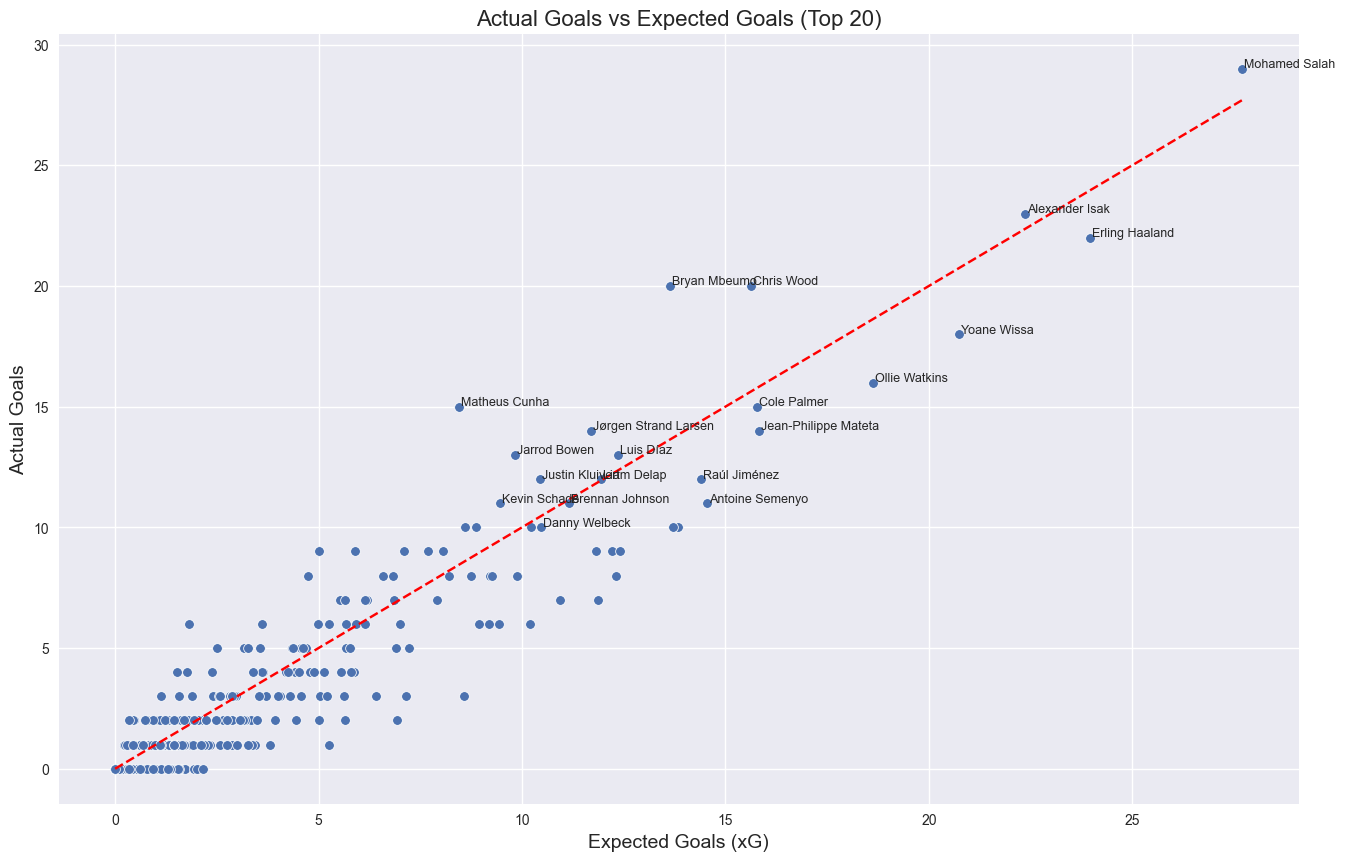

In [7]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=filtered_df, x='xG', y='Goals')

# Reference line
plt.plot([filtered_df['xG'].min(), filtered_df['xG'].max()],
         [filtered_df['xG'].min(), filtered_df['xG'].max()],
         color='red', linestyle='--')

# Select top 20 players by Goals
top_scorers = filtered_df.sort_values(by='Goals', ascending=False).head(20)

for idx, row in top_scorers.iterrows():
    plt.text(row['xG'] + 0.05, row['Goals'] + 0.05, row['Player'], fontsize=9)

plt.title('Actual Goals vs Expected Goals (Top 20)', fontsize=16)
plt.xlabel('Expected Goals (xG)', fontsize=14)
plt.ylabel('Actual Goals', fontsize=14)
plt.grid(True)
plt.show()

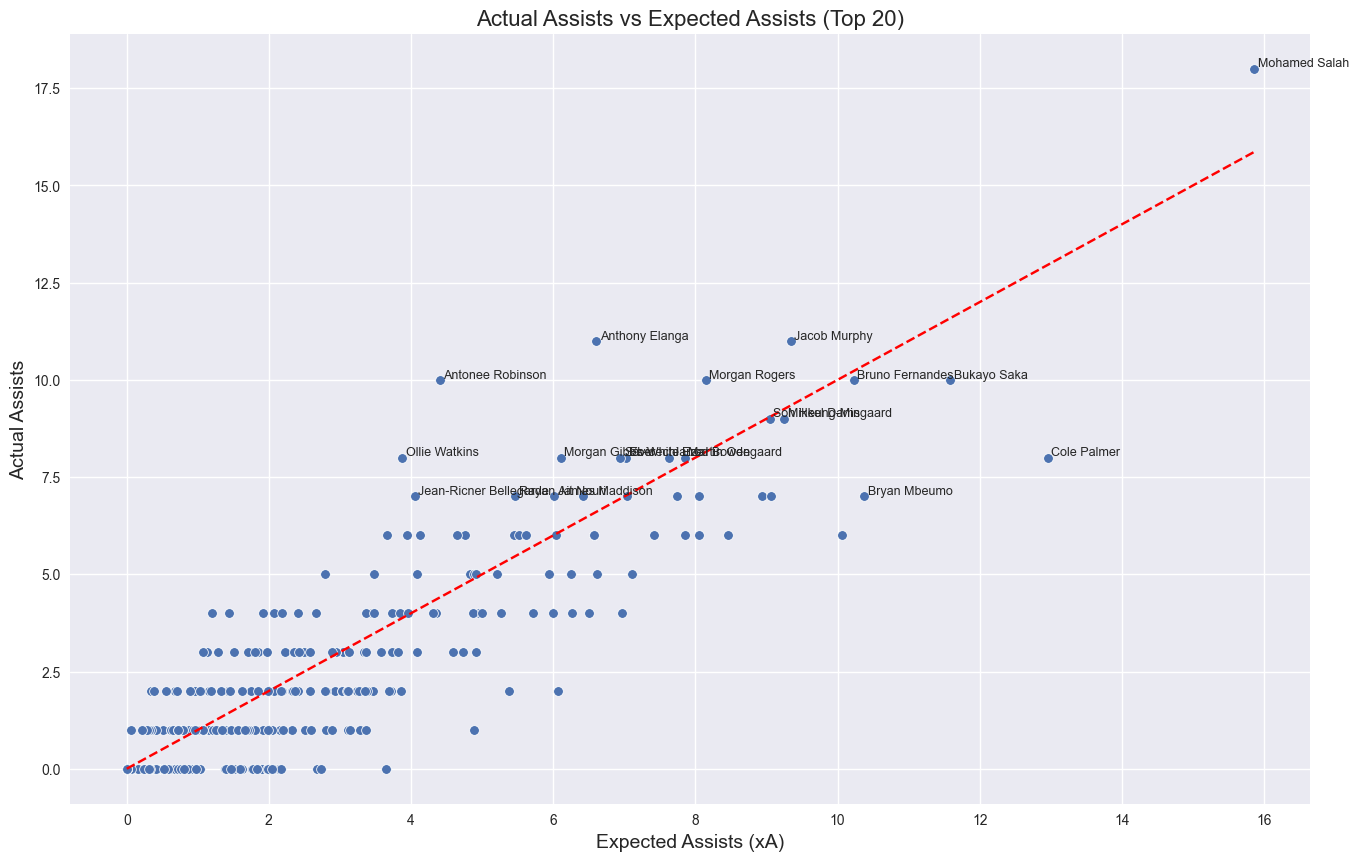

In [8]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=filtered_df, x='xA', y='Assists')

# Reference line
plt.plot([filtered_df['xA'].min(), filtered_df['xA'].max()],
         [filtered_df['xA'].min(), filtered_df['xA'].max()],
         color='red', linestyle='--')

# Select top 20 players by Assists
top_assisters = filtered_df.sort_values(by='Assists', ascending=False).head(20)

for idx, row in top_assisters.iterrows():
    plt.text(row['xA'] + 0.05, row['Assists'] + 0.05, row['Player'], fontsize=9)

plt.title('Actual Assists vs Expected Assists (Top 20)', fontsize=16)
plt.xlabel('Expected Assists (xA)', fontsize=14)
plt.ylabel('Actual Assists', fontsize=14)
plt.grid(True)
plt.show()

---
### Step 7 - Ranking Overperformers and Underperformers

To further analyze individual player performance, the dataset was sorted based on performance per 90 minutes. The top 10 overperformers and the top 10 underperformers were identified.

- **Overperformers:** Players with the highest positive difference between actual and expected goal contributions per 90 minutes.
- **Underperformers:** Players with the largest negative difference between actual and expected goal contributions per 90 minutes.

The results are displayed below, showing each player's performance per 90 minutes alongside their actual and expected goal contributions.


In [9]:
# Sort by Overperformance per 90
overperformers = filtered_df.sort_values(by='Performance Per90', ascending=False).head(10)
underperformers = filtered_df.sort_values(by='Performance Per90').head(10)

print("Top Overperformers per 90 Minutes:")
display(overperformers[['Player', 'Performance Per90', 'Goal Contributions Per90', 'xGoal Contributions Per90']])

print("\nTop Underperformers per 90 Minutes:")
display(underperformers[['Player', 'Performance Per90', 'Goal Contributions Per90', 'xGoal Contributions Per90']])


Top Overperformers per 90 Minutes:


,Player,Performance Per90,Goal Contributions Per90,xGoal Contributions Per90
92,Ethan Nwaneri,0.312140,0.611552,0.299411
152,Tariq Lamptey,0.285961,0.413793,0.127832
38,Amad Diallo Traore,0.214543,0.667727,0.453184
30,James Maddison,0.198851,0.777958,0.579107
7,Matheus Cunha,0.176856,0.722201,0.545345
148,Jean-Ricner Bellegarde,0.167640,0.478441,0.310801
263,Mats Wieffer,0.167042,0.364372,0.197330
151,Riccardo Calafiori,0.166092,0.273834,0.107742
86,Dwight McNeil,0.160356,0.655022,0.494666
59,Anthony Elanga,0.157870,0.600235,0.442366



Top Underperformers per 90 Minutes:


,Player,Performance Per90,Goal Contributions Per90,xGoal Contributions Per90
111,Eddie Nketiah,-0.415170,0.365854,0.781024
162,Cameron Archer,-0.344997,0.127750,0.472748
106,Dominic Calvert-Lewin,-0.294931,0.221538,0.516469
34,Ismaila Sarr,-0.274967,0.460190,0.735157
429,Jesper Lindstrom,-0.274458,0.070367,0.344825
181,Michail Antonio,-0.271568,0.209546,0.481114
354,Joe Willock,-0.270110,0.172579,0.442689
49,Dango Ouattara,-0.264822,0.491803,0.756625
221,Jack Harrison,-0.258004,0.042816,0.300820
141,David Brooks,-0.254153,0.192102,0.446256


---
## Step 8 - Interactive Scatter Plot: Actual Goals vs Expected Goals (xG)

In this section, interactive scatter plots were created to visually compare players' actual goal tallies against their expected goals (xG). These visualizations provided a dynamic way to identify players who were either overperforming (scoring more than expected) or underperforming (scoring less than expected) based on the quality of chances they received.

To maintain readability and focus, the analysis was limited to the top 20 goal scorers in the dataset.

Each data point represents a player, with player names labeled directly on the plot for clear identification. The scatter plot was designed using Plotly to allow interactive exploration of the data, enhancing the interpretability of individual player performances.


In [10]:
import plotly.express as px

# Selecting top 20 players by Goals
top_goals_df = players_df.sort_values(by='Goals', ascending=False).head(20)

fig = px.scatter(top_goals_df, 
                 x='xG', 
                 y='Goals', 
                 text='Player',  
                 labels={'Expected Goals': 'Expected Goals (xG)', 'Goals': 'Actual Goals'},
                 title='Actual Goals vs Expected Goals (xG) - Top 20 Players',
                 width=1000,
                 height=800)

fig.update_traces(marker=dict(size=12,
                              color='blue',
                              opacity=0.7),
                  textposition='top right')

fig.update_layout(xaxis_title='Expected Goals (xG)',
                  yaxis_title='Actual Goals',
                  showlegend=False)

fig.show()

In [11]:
# Selecting top 20 players by Assists
top_assists_df = players_df.sort_values(by='Assists', ascending=False).head(20)

fig = px.scatter(top_assists_df, 
                 x='xA', 
                 y='Assists', 
                 text='Player',  
                 labels={'Expected Assists': 'Expected Assists (xA)', 'Assists': 'Actual Assists'},
                 title='Actual Assists vs Expected Assists (xA) - Top 20 Players',
                 width=1000,
                 height=800)

fig.update_traces(marker=dict(size=12,
                              color='green',
                              opacity=0.7),
                  textposition='top right') 

fig.update_layout(xaxis_title='Expected Assists (xA)',
                  yaxis_title='Actual Assists',
                  showlegend=False)

fig.show()

---
## Step 9 - Filtering by Minimum Appearances

To ensure statistical reliability, a minimum appearance threshold was applied. Only players who participated in at least **20 games** during the 2024/25 Premier League season were included in this analysis. This filtering step helped focus the evaluation on players with a meaningful sample size, reducing the impact of outliers such as youth players or substitutes with limited playing time.

### Top 5 Overperformers per 90 Minutes
The players listed below consistently exceeded their expected goal contributions (xG + xA) per 90 minutes, indicating strong overperformance relative to their expected output.

### Top 5 Underperformers per 90 Minutes
The players listed below consistently fell short of their expected goal contributions per 90 minutes, indicating underperformance relative to the quality of chances they received or created.

The tables provided summarize the top five overperformers and underperformers, including each player's name, team, position, and overperformance value, considering only those with substantial playing time.


In [12]:
# Apply minimum games filter
filtered_df = players_df[players_df['Games'] >= 20]

# Sort to find top overperformers and underperformers per 90 mins
top_overperformers = filtered_df.sort_values(by='Performance Per90', ascending=False).head(5)
top_underperformers = filtered_df.sort_values(by='Performance Per90', ascending=True).head(5)

print("Top 5 Overperformers per 90 mins (Minimum 20 Games Played):")
display(top_overperformers[['Player', 'Team', 'Position', 'Performance Per90']])

print("\nTop 5 Underperformers per 90 mins (Minimum 20 Games Played):")
display(top_underperformers[['Player', 'Team', 'Position', 'Performance Per90']])

Top 5 Overperformers per 90 mins (Minimum 20 Games Played):


,Player,Team,Position,Performance Per90
92,Ethan Nwaneri,Arsenal,F M S,0.312140
51,Jhon Durán,Aston Villa,F S,0.266284
249,Brajan Gruda,Brighton,F M S,0.225508
38,Amad Diallo Traore,Manchester United,D F M S,0.214543
30,James Maddison,Tottenham,M S,0.198851



Top 5 Underperformers per 90 mins (Minimum 20 Games Played):


,Player,Team,Position,Performance Per90
111,Eddie Nketiah,Crystal Palace,F M S,-0.415170
212,Taiwo Awoniyi,Nottingham Forest,F S,-0.373701
162,Cameron Archer,Southampton,F S,-0.344997
237,Evan Ferguson,"Brighton,West Ham",F S,-0.336299
106,Dominic Calvert-Lewin,Everton,F S,-0.294931


---
# Conclusion and Key Takeaways: Player Overperformance and Underperformance

This analysis offered an in-depth evaluation of players' actual goal contributions compared to their expected contributions (xG + xA) in the 2024/25 Premier League season. By calculating per 90-minute statistics and applying a minimum games threshold, the study focused on players with sufficient playing time to ensure statistical relevance.

## Key Takeaways:
- **Overperformers:** These players consistently exceeded their expected output, suggesting outstanding finishing ability, intelligent off-the-ball movement, or temporary form peaks beyond expected levels.
- **Underperformers:** These players regularly underdelivered relative to their expected metrics, which could be attributed to poor shot selection, inefficient finishing, or natural variance that may stabilize over time.
- **Per 90 Analysis:** Evaluating contributions per 90 minutes, rather than using raw totals, provided a more accurate comparison across players with differing amounts of playing time.
- **Data-Driven Insights:** The analysis emphasized the importance of considering expected metrics (xG and xA) to gain a balanced perspective on player performance, moving beyond traditional goal and assist counts.

## Conclusion:
By integrating per 90-minute adjustments and expected metrics, this study provided a more nuanced understanding of player efficiency. The identification of overperformers and underperformers can offer valuable insights for managers, analysts, and recruitment teams when assessing players' true impact and potential areas for tactical or technical improvement. Ultimately, this approach reinforced the value of advanced performance analysis in modern football decision-making.

---